# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import scipy
import sklearn



# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data

y = mnist.target


X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [26]:
import numpy as np

def svd_helper(X, n_components):
    
    ''' svd_helper() Helper function which takes a matrix x, and n components'''
    covariance_matrix = np.dot(X.T, X)
    
  
    eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)
    
    
    eigen_val = np.real(eigen_vals)
    eigen_vec = np.real(eigen_vecs)
    
   
    sorted_indices = np.argsort(eigen_val)[::-1]
    sorted_eigenvectors = eigen_vec[:, sorted_indices]
    
   
    U = sorted_eigenvectors[:, :n_components]
    
  
    S = np.sqrt(eigen_vals[sorted_indices[:n_components]])
    
   
    V_T =( (np.dot(X, U)) / S)
    
    return U, S, V_T

def apply_svd_custom(X_train, X_test, n_components):
    
    ''' apply_svd_custom() function computes the SVD on the training data and uses it to transform
    both training and test data to a lower-dimensional space.'''
    
    U_train, _ , _ = svd_helper(X_train, n_components)
    
  
    x_train_red = np.dot(X_train, U_train)
    
    x_test_red = np.dot(X_test, U_train)
    
    return x_train_red, x_test_red


## Part 3: Train Logistic Regression and Measure Performance

In [27]:

def train_logistic_regression(X_train, y_train, X_test, y_test):
    
    ''''train_logistic_regression() trains a logistic regression model on the provided training data,
    measures the training time, and evaluates the model's accuracy on the test data. '''
    
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
 
    begin = time.time()
    model.fit(X_train, y_train)
    duration  = time.time() - begin
    
    pred = model.predict(X_test)
    score  = accuracy_score(y_test, pred)
    
    return score, duration


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [28]:
# SVD components to explore
svd_components = [100, 50, 20]

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")

# Fir each component we calculate the SVD and time it took. We train our model based on these results
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
  
    fet_train_red, fet_test_red = apply_svd_custom(X_train, X_test, n_components)
    
   
    accuracy, training_time = train_logistic_regression(fet_train_red, y_train, fet_test_red, y_test)
    
  
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying custom SVD with 100 components...


/home/aid/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 21.7345 seconds
Applying custom SVD with 50 components...


/home/aid/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 5.7570 seconds
Applying custom SVD with 20 components...


/home/aid/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8779, Training time: 0.7305 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


<Figure size 864x432 with 0 Axes>

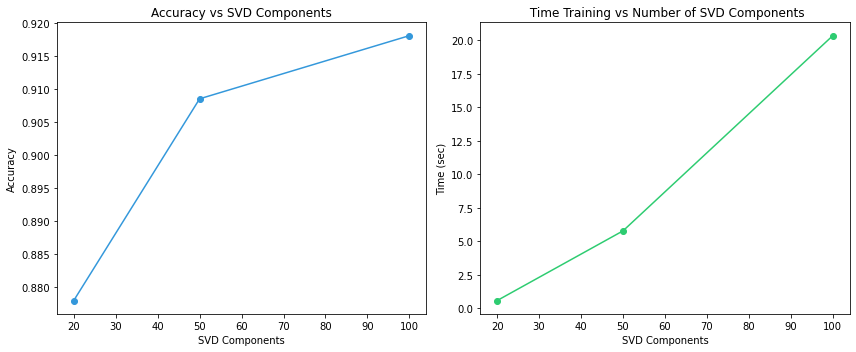

In [29]:

plt.figure(figsize=(12, 6))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(svd_components, accuracies, marker='o', color='#3498db')
plt.title('Accuracy vs SVD Components')
plt.xlabel('SVD Components')
plt.ylabel('Accuracy')


plt.subplot(1, 2, 2)
plt.plot(svd_components, times, marker='o', color='#2ecc71')
plt.title(' Time Training vs Number of SVD Components')
plt.xlabel('SVD Components')
plt.ylabel('Time (sec)')

plt.tight_layout()
plt.savefig("plots.jpg", dpi=300)
plt.show()


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

The results from the graph reveal that there's  trade-offs between model accuracy and training time. As the number of components increases from 20 to 100, accuracy improves from 0.88 to 0.92, with diminishing returns beyond 50 components. However, training time also increases significantly, from 2 seconds with 20 components to 20 seconds with 100 components. The optimal balance is around 50 components, offering high accuracy (~0.91) with reasonable training time (~7 seconds). This choice provides a good compromise between performance and computational efficiency, though the final decision depends on specific application requirements and available resources.